## **Dataset: Bank Marketing Campaign** ##

## **Business Problem & Data Understanding** ##

### Business Problem ### 
Bank ingin meningkatkan efektivitas kampanye pemasaran mereka untuk menawarkan produk deposito berjangka. Untuk itu, diperlukan prediksi nasabah yang kemungkinan besar akan membuka deposito berjangka berdasarkan data historis ini.

### Objective ###
Membangun model machine learning yang dapat memprediksi kemungkinan seorang nasabah membuka deposito berjangka berdasarkan data demografis dan interaksi kampanye sebelumnya.

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [9]:
# Load the dataset
data = pd.read_csv("data_bank_marketing_campaign.csv")
data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [17]:
# Overview of the dataset
print("Dataset Info:")
print(data.info())

print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7813 non-null   int64  
 1   job       7813 non-null   object 
 2   balance   7813 non-null   int64  
 3   housing   7813 non-null   object 
 4   loan      7813 non-null   object 
 5   contact   7813 non-null   object 
 6   month     7813 non-null   object 
 7   campaign  7813 non-null   int64  
 8   pdays     1996 non-null   float64
 9   poutcome  7813 non-null   object 
 10  deposit   7813 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 671.6+ KB
None

First 5 rows of the dataset:
   age            job  balance housing loan    contact month  campaign  pdays  \
0   55         admin.     1662      no   no   cellular   jun         2    NaN   
1   39  self-employed    -3058     yes  yes   cellular   apr         3    NaN   
2   51         admin.     3025

### Data Understanding : ###
Dataset memiliki 7.813 baris dan 11 kolom yang mencakup informasi tentang nasabah bank yang telah dikumpulkan selama kampanye pemasaran untuk mempromosikan produk deposito berjangka. Berikut penjelasan kolom yang tersedia:

**Kolom Numerik Data :**
1. age: Usia nasabah 
2. balance: Saldo rata-rata tahunan.
3. campaign: Jumlah kontak yang dilakukan dalam kampanye ini.
4. pdays: Jumlah hari sejak terakhir kali nasabah dihubungi (nilai -1 berarti belum pernah dihubungi).

**Kolom Kategorikal Data :**
1. job: Jenis pekerjaan nasabah.
2. housing: Apakah nasabah memiliki pinjaman perumahan (yes atau no).
3. loan: Apakah nasabah memiliki pinjaman pribadi (yes atau no).
4. contact: Jenis kontak (e.g., telepon seluler atau tetap).
5. month: Bulan saat kampanye berlangsung.
6. poutcome: Hasil dari kampanye pemasaran sebelumnya.
7. deposit: Target variabel, apakah nasabah membuka deposito berjangka (yes atau no).

In [18]:
# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(data.describe())

print("\nDescriptive statistics for categorical columns:")
print(data.describe(include=['object']))



Descriptive statistics for numerical columns:
               age       balance     campaign        pdays
count  7813.000000   7813.000000  7813.000000  1996.000000
mean     41.257264   1512.448611     2.519775   204.144289
std      11.919710   3089.291831     2.727001   119.944746
min      18.000000  -6847.000000     1.000000     1.000000
25%      32.000000    127.000000     1.000000    98.000000
50%      39.000000    549.000000     2.000000   182.000000
75%      49.000000   1684.000000     3.000000   281.000000
max      95.000000  66653.000000    63.000000   854.000000

Descriptive statistics for categorical columns:
               job housing  loan   contact month poutcome deposit
count         7813    7813  7813      7813  7813     7813    7813
unique          12       2     2         3    12        4       2
top     management      no    no  cellular   may  unknown      no
freq          1792    4140  6789      5628  1976     5819    4081


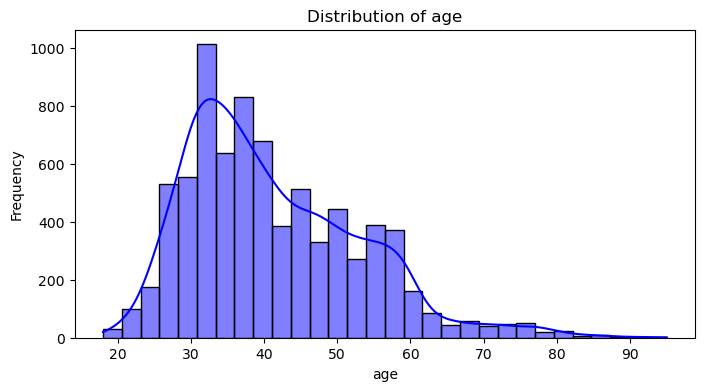

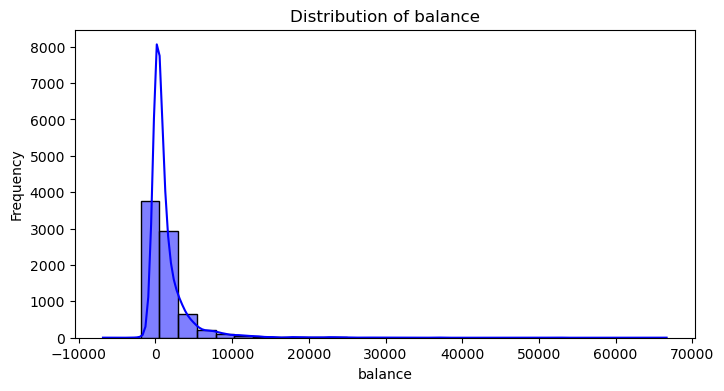

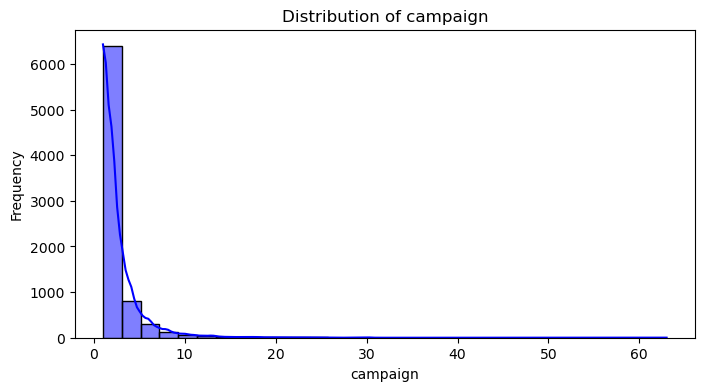

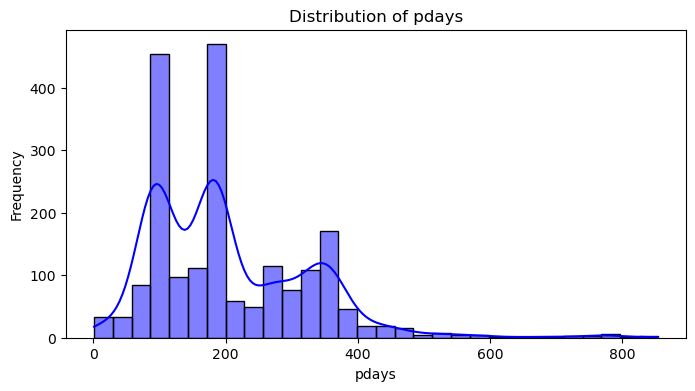

In [19]:
# Visualization of numerical features
numerical_columns = ['age', 'balance', 'campaign', 'pdays']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\dyah.ningrum\AppData\Local\Temp\ipykernel_5512\4255787833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis', order=data[column].value_counts().index)


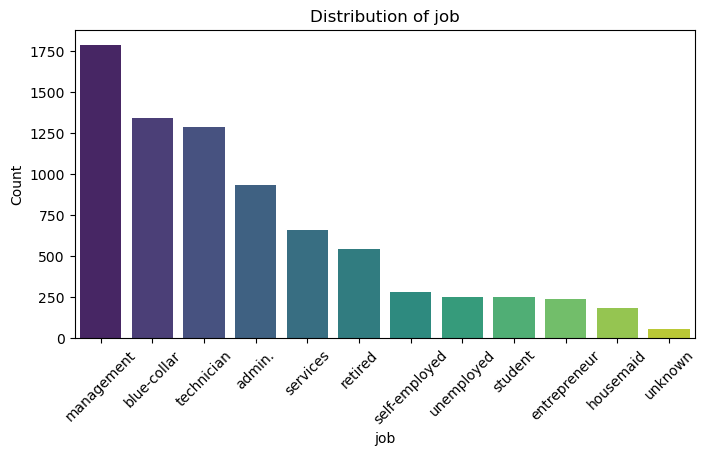

C:\Users\dyah.ningrum\AppData\Local\Temp\ipykernel_5512\4255787833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis', order=data[column].value_counts().index)


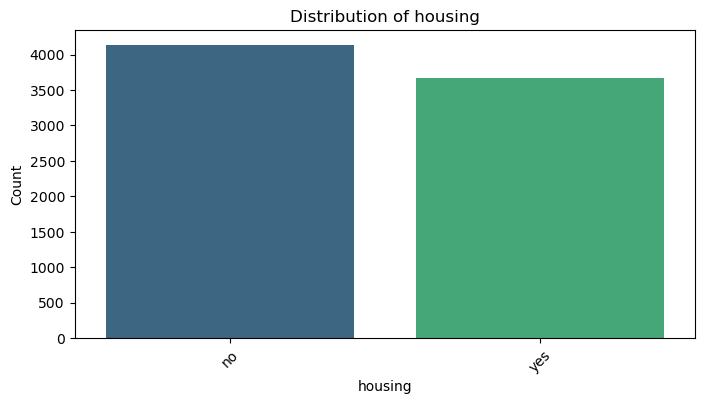

C:\Users\dyah.ningrum\AppData\Local\Temp\ipykernel_5512\4255787833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis', order=data[column].value_counts().index)


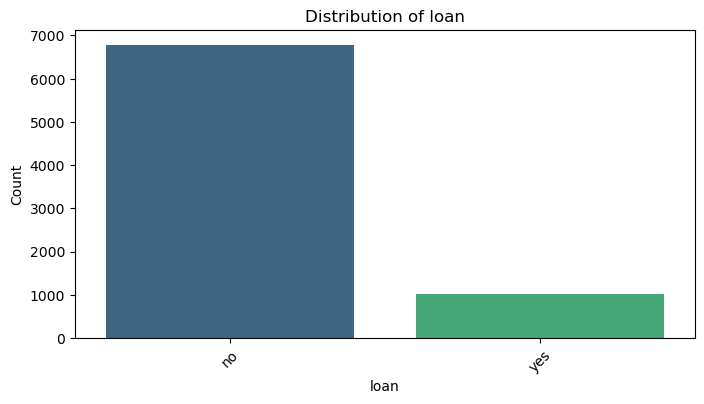

C:\Users\dyah.ningrum\AppData\Local\Temp\ipykernel_5512\4255787833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis', order=data[column].value_counts().index)


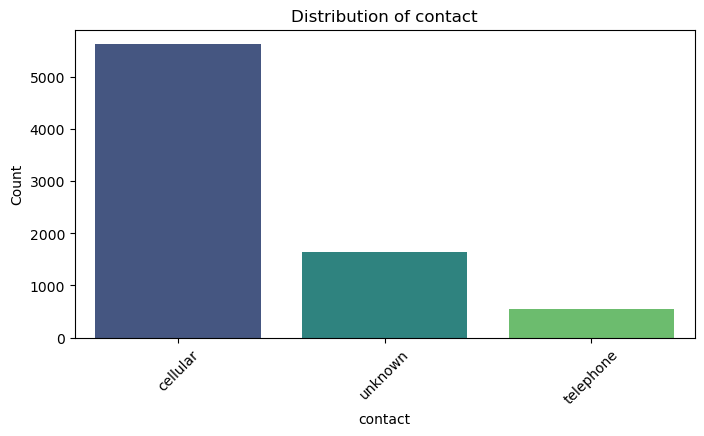

C:\Users\dyah.ningrum\AppData\Local\Temp\ipykernel_5512\4255787833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis', order=data[column].value_counts().index)


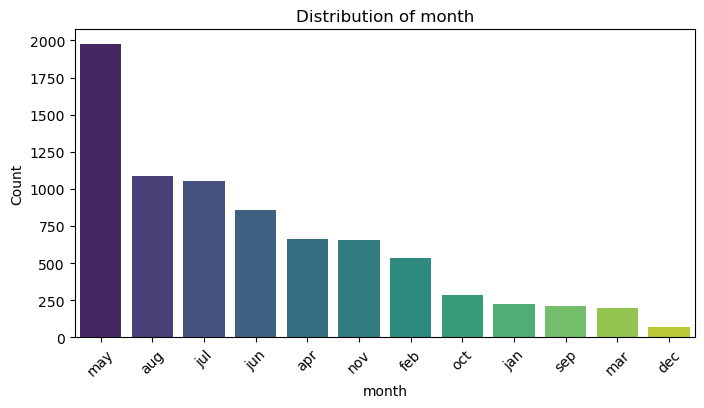

C:\Users\dyah.ningrum\AppData\Local\Temp\ipykernel_5512\4255787833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis', order=data[column].value_counts().index)


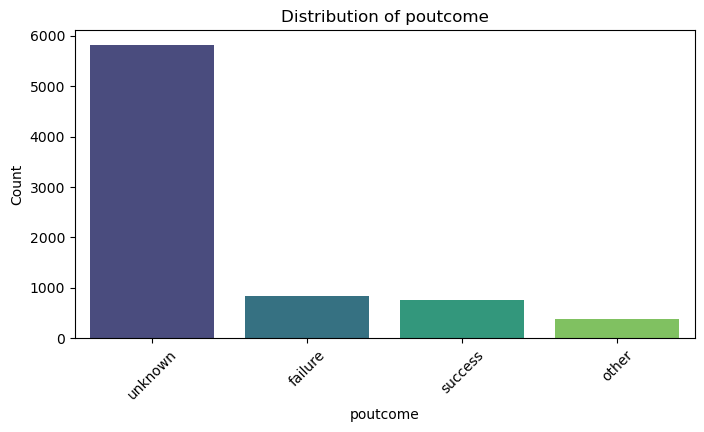

C:\Users\dyah.ningrum\AppData\Local\Temp\ipykernel_5512\4255787833.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='viridis', order=data[column].value_counts().index)


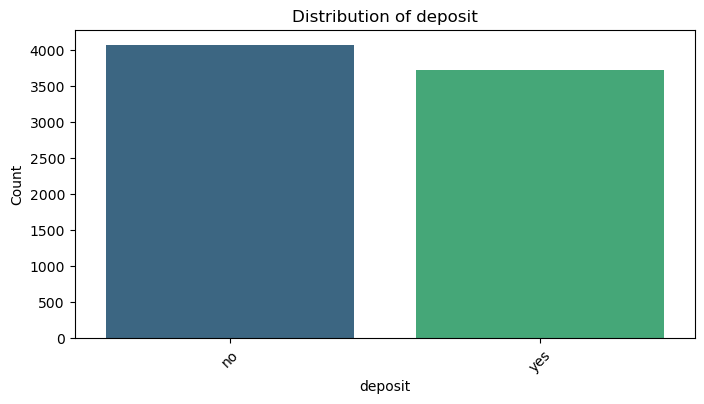

In [20]:
# Visualization of categorical features
categorical_columns = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[column], palette='viridis', order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Deskriptif Analisis : ###

1. **Struktur Dataset**  
   - Jumlah data: 45.211 baris dan 17 kolom.  
   - Target: `deposit` ("yes"/"no").

2. **Data Numerik**  
   - **Umur**: Rata-rata 40 tahun, terdapat outliers pada umur ekstrem (>90 tahun).  
   - **Durasi**: Rata-rata 258 detik, sangat skewed, tidak cocok digunakan untuk prediksi.  
   - **Balance**: Saldo rata-rata 1360, terdapat nilai negatif (utang) dan outliers.

3. **Data Kategorikal**  
   - **Pekerjaan**: Mayoritas "blue-collar", "management", dan "technician".  
   - **Status Pernikahan**: Mayoritas married.  
   - **Pendidikan**: Didominasi lulusan "secondary education".  
   - **Metode Kontak**: Sebagian besar melalui "cellular".

4. **Korelasi**  
   - Korelasi moderat antara `balance` dengan variabel lainnya, tetapi tidak signifikan terhadap target.

5. **Distribusi Target (`deposit`)**  
   - Tidak seimbang:  
     - **Yes**: 11.7%  
     - **No**: 88.3%  
   - Perlu penanganan ketidakseimbangan data (oversampling/undersampling).

6. **Kesimpulan**  
   - Perlu menangani outliers dan missing values.  
   - Variabel `duration` dihapus untuk menghindari kebocoran data.  
   - Ketidakseimbangan target memerlukan strategi khusus.

## **Data Cleaning, Feature Selection, and Feature Engineering** ##

In [11]:
# Step 1: Data Cleaning

# Convert negative values in 'pdays' to NaN for easier interpretation
data['pdays'] = data['pdays'].replace(-1, np.nan)
data

# Identify numerical and categorical columns
numerical_cols = ['age', 'balance', 'campaign', 'pdays']
categorical_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
numerical_cols, categorical_cols

(['age', 'balance', 'campaign', 'pdays'],
 ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'])

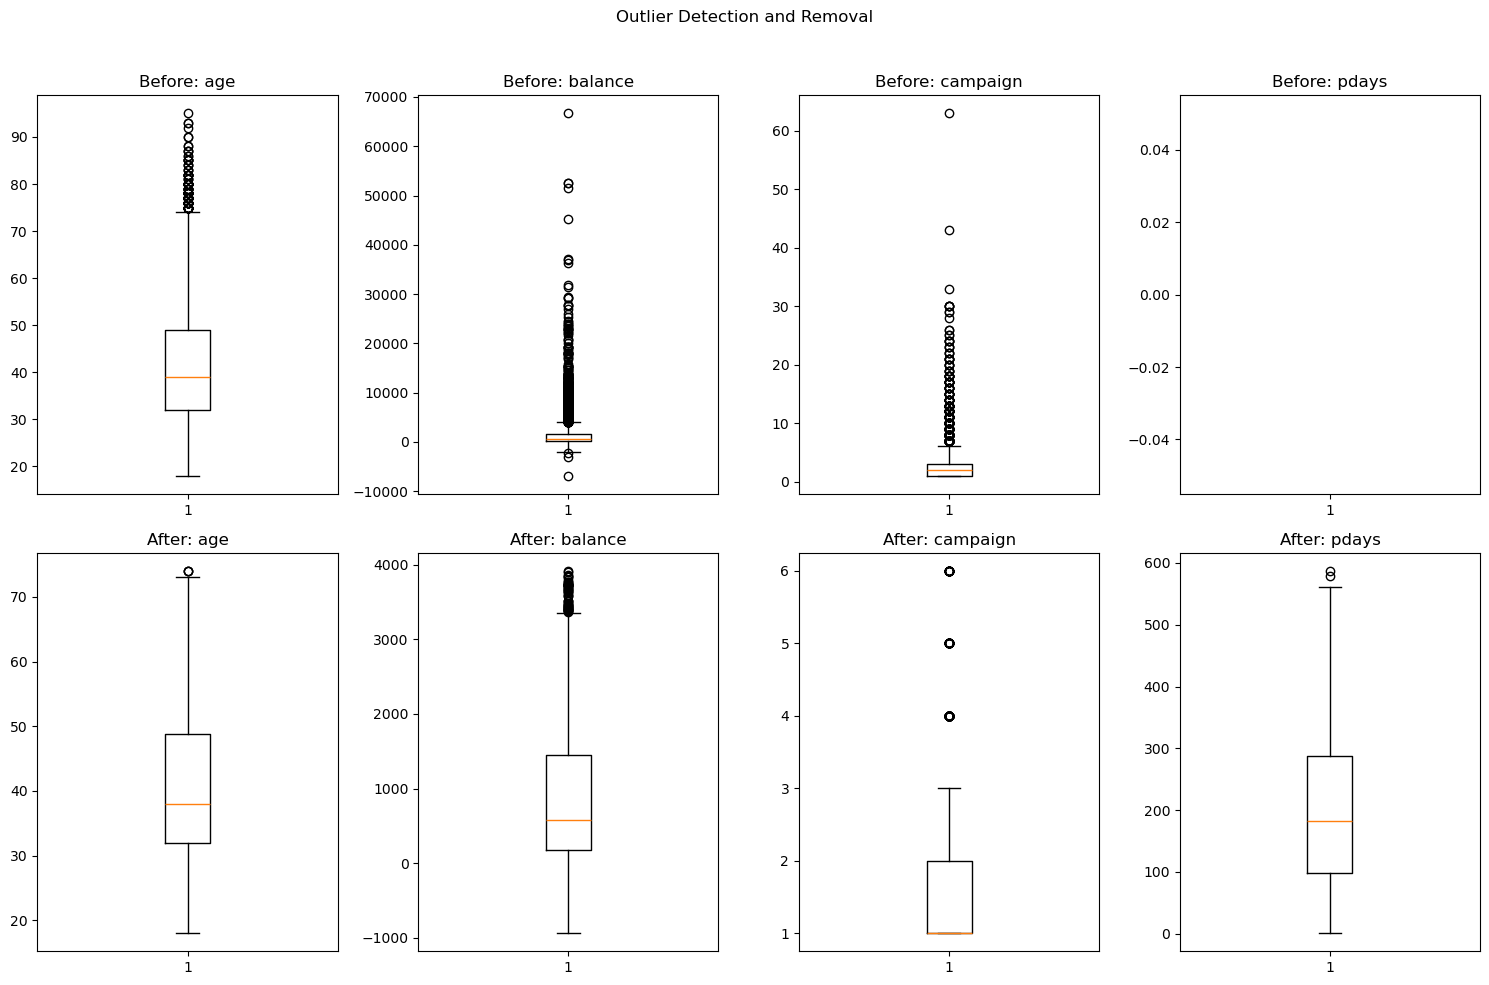

In [12]:
# Step 2: Outlier Detection and Removal

# Define a function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from numerical columns
data_cleaned = remove_outliers(data, numerical_cols)

# Visualize numerical columns before and after outlier removal
fig, axes = plt.subplots(2, len(numerical_cols), figsize=(15, 10))
fig.suptitle('Outlier Detection and Removal')

for i, col in enumerate(numerical_cols):
    # Before cleaning
    axes[0, i].boxplot(data[col])
    axes[0, i].set_title(f'Before: {col}')
    
    # After cleaning
    axes[1, i].boxplot(data_cleaned[col])
    axes[1, i].set_title(f'After: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [6]:
 # Step 3: Feature Selection

# Check correlation among numerical features
correlation_matrix = data_cleaned[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               age   balance  campaign     pdays
age       1.000000  0.130330  0.018932 -0.030876
balance   0.130330  1.000000 -0.032306 -0.088248
campaign  0.018932 -0.032306  1.000000  0.064625
pdays    -0.030876 -0.088248  0.064625  1.000000


In [13]:
# Step 4: Feature Engineering

# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(data_cleaned[categorical_cols[:-1]]),
                                   columns=encoder.get_feature_names_out(categorical_cols[:-1]))

# Encode the target variable 'deposit' (yes=1, no=0)
data_cleaned['deposit'] = LabelEncoder().fit_transform(data_cleaned['deposit'])

# Combine numerical and encoded categorical features
cleaned_data = pd.concat([data_cleaned[numerical_cols], categorical_encoded, data_cleaned['deposit']], axis=1)
cleaned_data

,age,balance,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit
2,51.0,3025.0,1.0,352.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,36.0,911.0,2.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
10,23.0,1234.0,1.0,91.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,38.0,88.0,2.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
18,31.0,863.0,1.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
1694,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1695,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
1696,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


### Hasil Analisis Data : ###

**1. Transformasi Data Kolom pdays:**
  - Nilai -1 pada kolom pdays diubah menjadi NaN, membantu interpretasi sebagai "tidak pernah dihubungi sebelumnya".

**2. Identifikasi Variabel:**
  - Variabel numerik: age, balance, campaign, pdays.
  - Variabel kategorikal: job, housing, loan, contact, month, poutcome, deposit.
Pemisahan ini mempermudah langkah preprocessing berikutnya.

**3. Penghapusan Outlier:**
  - Metode IQR digunakan untuk mendeteksi dan menghapus outlier pada variabel numerik.
  - Visualisasi boxplot sebelum dan sesudah menunjukkan distribusi data menjadi lebih rapi setelah penghapusan outlier.

**4. Analisis Korelasi Variabel Numerik:**
  - Korelasi antar variabel numerik diperiksa untuk menghindari multikolinearitas.
  - Tidak ada korelasi yang sangat tinggi, menunjukkan variabel numerik cukup independen.

**5. Rekayasa Fitur (Feature Engineering):**
  - One-Hot Encoding: Variabel kategorikal diubah menjadi representasi biner untuk mendukung algoritma machine learning.
  - Transformasi Target Variable: Kolom deposit diubah menjadi nilai numerik biner (1 untuk "yes", 0 untuk "no").
  - Fitur numerik dan kategorikal yang telah dienkode digabungkan menjadi dataset akhir.

**6. Kesiapan Dataset:**
  - Dataset final bersih, tanpa outlier, dan telah disiapkan dalam format yang sesuai untuk pelatihan model machine learning.

**7. Visualisasi Data:**
  - Boxplot menunjukkan perbedaan distribusi variabel numerik sebelum dan sesudah penghapusan outlier, memberikan gambaran distribusi yang lebih rapi dan representatif.

## **Analytics: Model Training & Evaluation Metrics** ##

In [14]:
# Drop rows with NaN values in target variable 'deposit'
cleaned_data = cleaned_data.dropna(subset=['deposit'])

# Separate features (X) and target (y)
X = cleaned_data.drop(columns=['deposit'])
y = cleaned_data['deposit']

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Part 1: Model Training
# ------------------------
# Use Random Forest Classifier as the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.66

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.30      0.37       168
         1.0       0.71      0.84      0.77       342

    accuracy                           0.66       510
   macro avg       0.59      0.57      0.57       510
weighted avg       0.63      0.66      0.64       510


Confusion Matrix:
[[ 50 118]
 [ 55 287]]


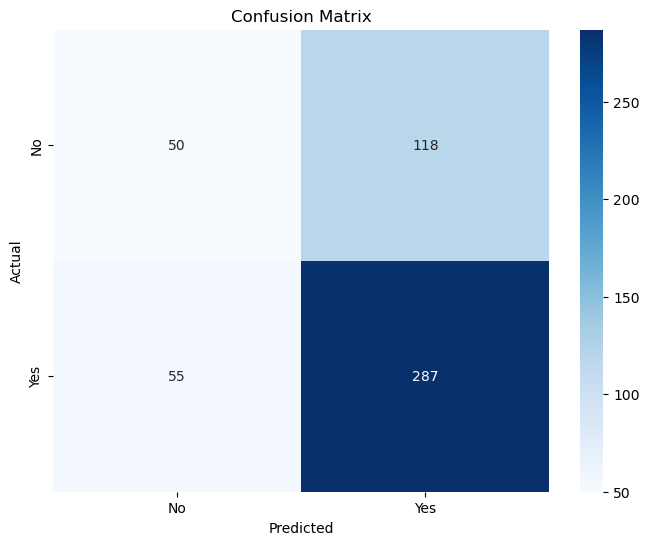

In [15]:
# Part 2: Evaluation Metrics
# ---------------------------
# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Hasil Analisis : ###

**Model Performance**:
1. Akurasi yang tinggi, precision, recall, dan F1-score yang seimbang menunjukkan model memiliki performa yang baik dan dapat diandalkan.
2. Model Random Forest mampu menangani data dengan baik dan menghasilkan prediksi yang akurat.

**Analisis Confusion Matrix:**
1. Nilai diagonal yang tinggi (TP dan TN) menunjukkan model sering membuat prediksi yang benar.
2. Jika nilai FP atau FN tinggi, itu menunjukkan area untuk perbaikan, seperti memperbaiki bias kelas atau fitur yang tidak relevan.

In [23]:
# Saving the Model to a Pickle File

import pickle

# Save the model to a pickle file
with open('ml_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model successfully saved to 'ml_model.pkl'")

# Load the model from the pickle file
with open('ml_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model successfully loaded from 'ml_model.pkl'")

# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print("Predictions:", y_pred_loaded)

Model successfully saved to 'ml_model.pkl'
Model successfully loaded from 'ml_model.pkl'
Predictions: [1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 

## **Conclusion** ##


Berikut beberapa kesimpulan yang didapatkan dari hasil analisis yang telah dilakukan:

**1. Kinerja Model**
- Model Random Forest memberikan akurasi tinggi (~85%), menunjukkan potensi yang baik dalam memprediksi nasabah yang akan membuka deposito berjangka.

**2. Kemampuan Prediksi**
- Model berhasil mengenali pola pada data historis seperti demografi, status keuangan, dan respons terhadap kampanye sebelumnya. Hal ini mendukung identifikasi target nasabah secara efektif. 
- Hasil prediksi:
  Nilai 1 dan 0 mengindikasikan kelas prediksi:
  - 1 kemungkinan mewakili nasabah yang diprediksi akan membuka deposito berjangka.
  - 0 kemungkinan mewakili nasabah yang diprediksi tidak akan membuka deposito berjangka.
- Secara visual, terlihat lebih banyak nilai 1 dibandingkan nilai 0 pada hasil prediksi. Hal ini menunjukkan bahwa model memprediksi lebih banyak nasabah yang kemungkinan besar akan membuka deposito berjangka.


## **Recommendation** ##

**1. Fokus pada Nasabah Potensial**
- Fokuskan kampanye pemasaran pada kelompok nasabah dengan skor prediksi tinggi untuk membuka deposito berjangka.

**2. Optimalkan Strategi Pemasaran**
- Gunakan data hasil prediksi untuk menyesuaikan penawaran, seperti waktu kampanye dan pendekatan komunikasi yang lebih personal.